In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ayuraj/asl-dataset

Dataset URL: https://www.kaggle.com/datasets/ayuraj/asl-dataset
License(s): CC0-1.0
 97% 55.0M/56.9M [00:03<00:00, 24.8MB/s]
100% 56.9M/56.9M [00:03<00:00, 17.3MB/s]


In [ ]:
!unzip asl-dataset.zip -d asl-dataset

Streaming output truncated to the last 5000 lines.
  inflating: asl-dataset/asl_dataset/0/hand2_0_dif_seg_1_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_dif_seg_2_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_dif_seg_3_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_dif_seg_4_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_dif_seg_5_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_left_seg_1_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_left_seg_2_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_left_seg_3_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_left_seg_4_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_left_seg_5_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_right_seg_1_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_right_seg_2_cropped.jpeg  
  inflating: asl-dataset/asl_dataset/0/hand2_0_right_seg_3_cropped.jpeg  
  

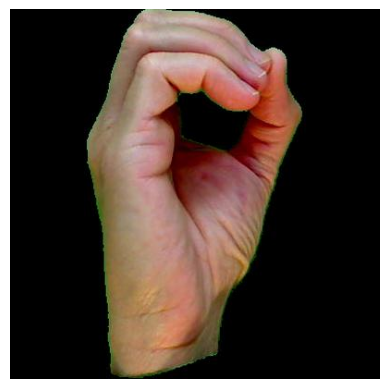

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image (OpenCV loads images in BGR format by default)
img = cv2.imread('/content/asl-dataset/asl_dataset/0/hand1_0_bot_seg_1_cropped.jpeg')

# Convert BGR to RGB for accurate color display in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
img_rgb.shape

(400, 400, 3)

In [ ]:
import os

folder_path ='/content/asl-dataset/asl_dataset/z'
img_files = [f for f in os.listdir(folder_path)]
len(img_files)

70

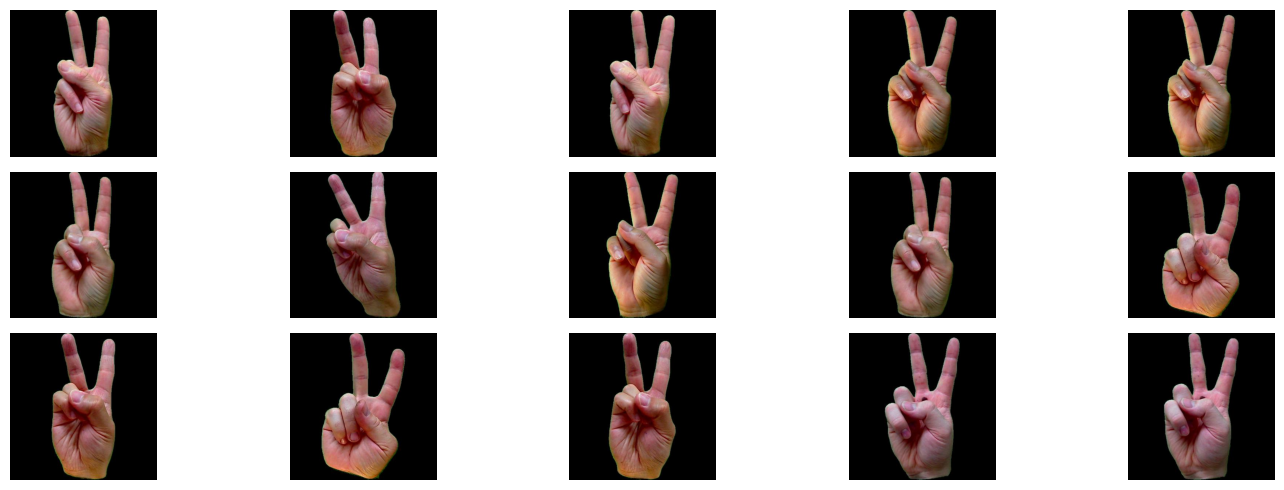

In [ ]:
import os
def display_images_from_folder(folder_path, num_images, cols):
    """
    Loads and displays a specified number of images from a folder in a grid format.

    Parameters:
    - folder_path: str, path to the folder containing images.
    - num_images: int, number of images to display.
    - cols: int, number of columns in the grid.

    """
    # List all image files in the folder and limit to the specified number
    image_files = [f for f in os.listdir(folder_path)][:num_images]

    # Check if there are enough images to display
    if not image_files:
        print("No images found in the specified folder.")
        return

    # Load images
    images = []
    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
        images.append(img_rgb)

    # Calculate number of rows needed
    rows = (len(images) + cols - 1) // cols

    # Display images in a grid
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
                              #position index of image
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
display_images_from_folder("/content/asl-dataset/asl_dataset/2", num_images=15, cols=5)

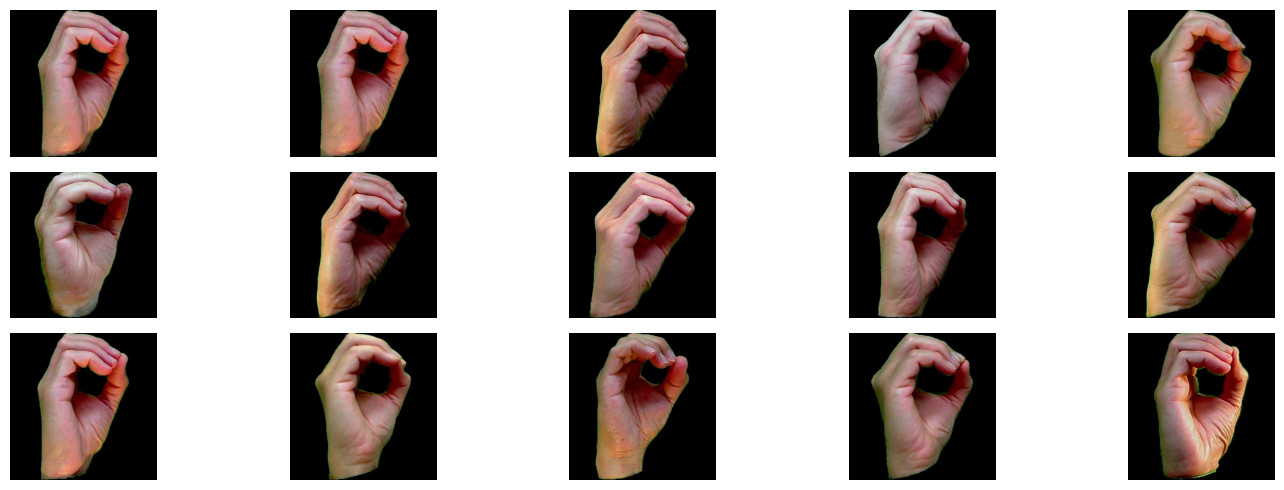

In [ ]:
display_images_from_folder("/content/asl-dataset/asl_dataset/o", num_images=15, cols=5)

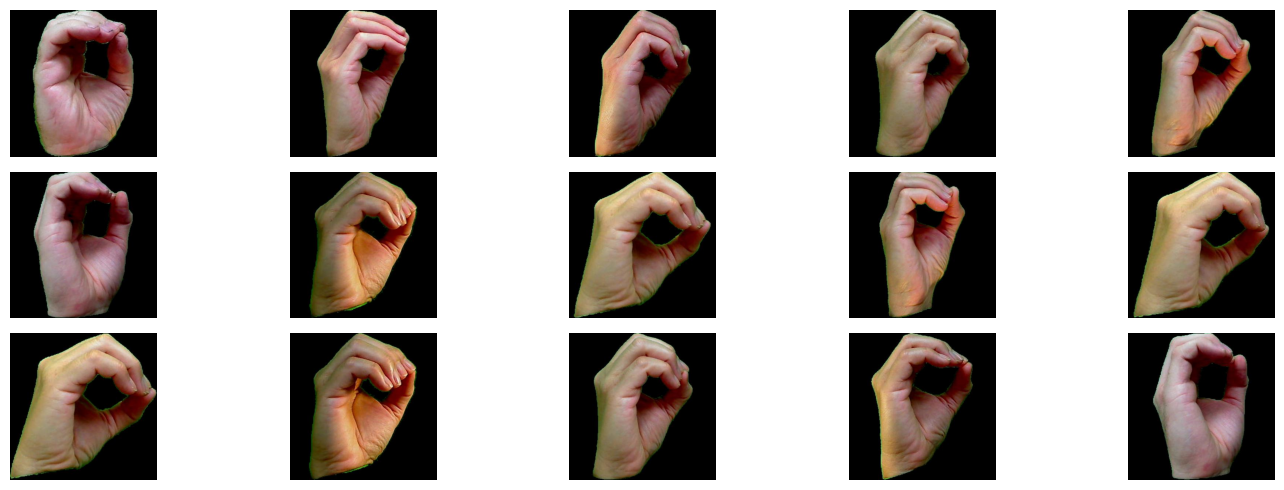

In [ ]:
display_images_from_folder("/content/asl-dataset/asl_dataset/0", num_images=15, cols=5)

**Libraries**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

**Data preparation**

In [ ]:
data_dir = "/content/asl-dataset/asl_dataset/asl_dataset"
categories = sorted(os.listdir(data_dir))  # Fetch folder names (letters/numbers) as categories
img_size = 64

categories
len(categories)
#categories.index('a')

36

In [ ]:
X = []  # List to store image data
y = []  # List to store labels


for category in categories:
    folder_path = os.path.join(data_dir, category)
    label = categories.index(category)  # Assign a numeric label based on the folder's index
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        X.append(img)
        y.append(label)


                                                # 1 -->grays , 3-->RGB
X = np.array(X).reshape(-1, img_size, img_size, 1)  # Reshape images to fit neural network input format
X = X / 255.0  # Normalize the pixel values to the range [0, 1]
y = np.array(y)  # Convert the labels list to a NumPy array
y = to_categorical(y, num_classes=len(categories))  # Convert labels to one-hot encoding 1 ----> [0,1,0,0,0,........]
y[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1.])

**Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build the Model**

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,239,588 (12.36 MB)

 Trainable params: 3,239,588 (12.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 5, verbose=1,factor=0.5, min_lr=0.00001)#early stopping
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images within a 20-degree range.
    width_shift_range=0.2,  # Randomly shift the image horizontally by up to 20% of the image width.
    height_shift_range=0.2,  # Randomly shift the image vertically by up to 20% of the image height.
    shear_range=0.2,  # Apply random shear transformations (tilting) to the images.
    zoom_range=0.2,  # Randomly zoom into images by up to 20%.
    horizontal_flip=True,  # Randomly flip images horizontally.
    fill_mode='nearest'  # Fill new pixels after transformation with the nearest pixel value.
)

datagen.fit(X_train)

In [ ]:
# Compile and train the model
%%time
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2,callbacks=[learning_rate_reduction])

Epoch 1/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 218ms/step - accuracy: 0.1929 - loss: 2.9797 - val_accuracy: 0.8065 - val_loss: 0.7189 - learning_rate: 0.0010
Epoch 2/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.7402 - loss: 0.8729 - val_accuracy: 0.8586 - val_loss: 0.4163 - learning_rate: 0.0010
Epoch 3/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.8729 - loss: 0.3971 - val_accuracy: 0.8809 - val_loss: 0.3539 - learning_rate: 0.0010
Epoch 4/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - accuracy: 0.8998 - loss: 0.3103 - val_accuracy: 0.8908 - val_loss: 0.2871 - learning_rate: 0.0010
Epoch 5/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.9140 - loss: 0.2537 - val_accuracy: 0.9132 - val_loss: 0.2738 - learning_rate: 0.0010
Epoch 6/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.9418 - loss: 0.1990 - val_accuracy: 0.9107 - val_loss: 0.2591 - learning_rate: 0.0010
Epoch 7/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.9550 - loss: 0.

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


print(f"Training Accuracy: {train_acc[-1]:.2f}")
print(f"Validation Accuracy: {val_acc[-1]:.2f}")

Training Accuracy: 1.00
Validation Accuracy: 0.95


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc_percentage = test_acc * 100
print(f"Test Accuracy: {test_acc_percentage:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9643 - loss: 0.1341
Test Accuracy: 96.22%


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


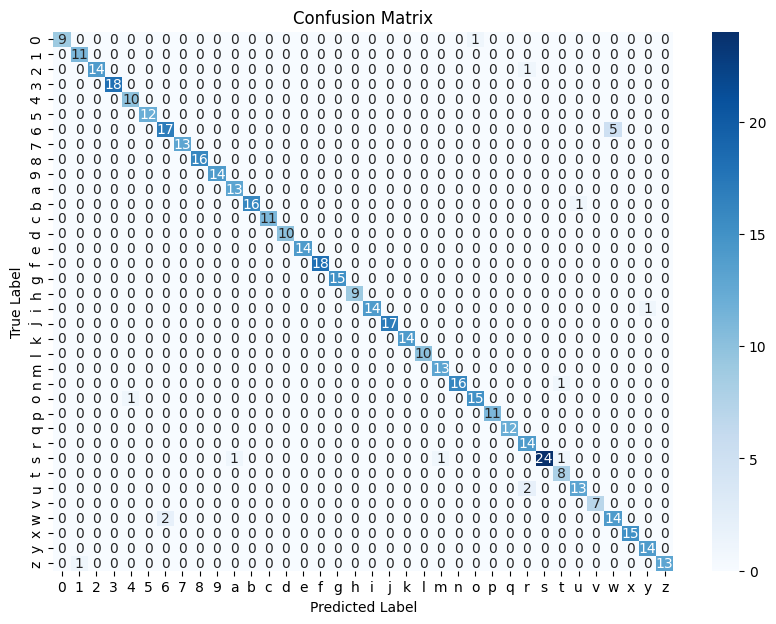

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Calculate the confusion matrix
y_test_classes = np.argmax(y_test, axis=1)  # Convert the true labels to class labels
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
report = classification_report(y_test_classes, y_pred_classes, target_names=categories)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        18
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00        12
           6       0.89      0.77      0.83        22
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        14
           a       0.93      1.00      0.96        13
           b       1.00      0.94      0.97        17
           c       1.00      1.00      1.00        11
           d       1.00      1.00      1.00        10
           e       1.00      1.00      1.00        14
           f       1.00      1.00      1.00        18
           g       1.00      1.00      1.00        15
           h       1.00    

In [ ]:
def predict_image(image_path, model, categories):
    """
    Predict the letter or number in a new image using the trained model.
    """
    # 1. Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_size = 64
    img = cv2.resize(img, (img_size, img_size))  # Resize the image to match training dimensions
    img = img.reshape(-1, img_size, img_size, 1)  # Reshape the image to fit the model's input shape
    img = img / 255.0  # Normalize the pixel values (scale between 0 and 1)

    # 2. Predict using the model
    prediction = model.predict(img)  # Predict probabilities for all categories
    predicted_class = np.argmax(prediction)  # Get the class with the highest probability

    # 3. Map the number to the corresponding letter
    predicted_label = categories[predicted_class]  # Get the label (letter) from the categories list

    return predicted_label, prediction[0][predicted_class]  # Return the label and its confidence


image_path = "/content/asl-dataset/asl_dataset/f/hand1_f_bot_seg_1_cropped.jpeg"
predicted_label, confidence = predict_image(image_path, model, categories)

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Label: f
Confidence: 100.00%


In [ ]:
image_path = "/content/asl-dataset/asl_dataset/3/hand1_3_bot_seg_1_cropped.jpeg"
predicted_label, confidence = predict_image(image_path, model, categories)

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Label: 3
Confidence: 100.00%


In [ ]:
image_path = "/content/asl-dataset/asl_dataset/q/hand1_q_bot_seg_3_cropped.jpeg"
predicted_label, confidence = predict_image(image_path, model, categories)

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Label: q
Confidence: 100.00%


In [ ]:
image_path = "/content/asl-dataset/asl_dataset/x/hand1_x_bot_seg_1_cropped.jpeg"
predicted_label, confidence = predict_image(image_path, model, categories)

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence * 100:.2f}%")

In [ ]:
image_path = "/content/asl-dataset/asl_dataset/o/hand1_o_bot_seg_5_cropped.jpeg"
predicted_label, confidence = predict_image(image_path, model, categories)

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Label: o
Confidence: 98.84%


In [ ]:
model.save('my_model.keras')


In [ ]:
image_path = "/content/asl-dataset/asl_dataset/6/hand1_6_bot_seg_1_cropped.jpeg"
predicted_label, confidence = predict_image(image_path, model, categories)

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence * 100:.2f}%")

Image size = 32

*   Train_acc = 99%
*   Val_acc = 96%
*   Test_acc = 97.02%

with YUV

*   Train_acc = 99%
*   Val_acc = 95%
*   Test_acc = 95.63%
---------------------------------------------
Image size = 64

*   Train_acc = 100%
*   Val_acc = 98%
*   **Test_acc = 98.01%**

with YUV

*   Train_acc = 100%
*   Val_acc = 97%
*   Test_acc = 97.61%
--------------------------------------------
Image size = 128

*   Train_acc = 100%
*   Val_acc = 98%
*   Test_acc = 96.62%

with YUV

*   Train_acc = 100%
*   Val_acc = 98%
*   Test_acc = 97.02%







In [ ]:
import matplotlib.pyplot as plt

# Data Dictionary
results = {
    32: {
        "RGB": {"Val_acc": 96, "Test_acc": 97.02},
        "YUV": {"Val_acc": 95, "Test_acc": 95.63},
    },
    64: {
        "RGB": {"Val_acc": 98, "Test_acc": 98.01},
        "YUV": {"Val_acc": 97, "Test_acc": 97.61},
    },
    128: {
        "RGB": {"Val_acc": 98, "Test_acc": 96.62},
        "YUV": {"Val_acc": 98, "Test_acc": 97.02},
    },
}

# Extracting data for visualization
image_sizes = list(results.keys())

# Accuracy metrics for RGB
rgb_val_acc = [results[size]["RGB"]["Val_acc"] for size in image_sizes]
rgb_test_acc = [results[size]["RGB"]["Test_acc"] for size in image_sizes]

# Accuracy metrics for YUV
yuv_val_acc = [results[size]["YUV"]["Val_acc"] for size in image_sizes]
yuv_test_acc = [results[size]["YUV"]["Test_acc"] for size in image_sizes]

# Plotting
plt.figure(figsize=(10, 6))

# RGB Plots
plt.plot(image_sizes, rgb_val_acc, label='RGB Val Accuracy', marker='s', linestyle='--', color='blue')
plt.plot(image_sizes, rgb_test_acc, label='RGB Test Accuracy', marker='d', linestyle=':', color='blue')

# YUV Plots
plt.plot(image_sizes, yuv_val_acc, label='YUV Val Accuracy', marker='s', linestyle='--', color='orange')
plt.plot(image_sizes, yuv_test_acc, label='YUV Test Accuracy', marker='d', linestyle=':', color='orange')

# Adding labels and title
plt.title("Validation and Test Accuracy vs Image Size for RGB and YUV", fontsize=16)
plt.xlabel("Image Size", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xticks(image_sizes, fontsize=12)
plt.yticks(range(90, 101), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show Plot
plt.show()